In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp

In [3]:
data = pd.read_csv('../01_raw/abort.csv',header=None,names=['time','signal'])

In [4]:
data['avg'] = data['signal'].rolling(5,center=True).mean()

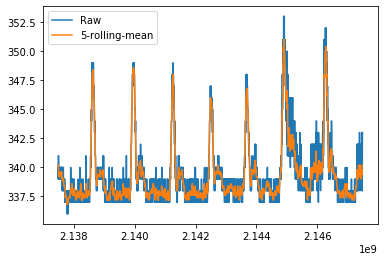

In [6]:
mp.plot(data.tail(2000)['time'],data.tail(2000)['signal'],label='Raw')
mp.plot(data.tail(2000)['time'],data.tail(2000)['avg'],label='5-rolling-mean')
mp.legend()
#data.head(3000).plot('time','signal')
#data.head(3000).plot('time','avg')

In [ ]:
data.describe()